# **¿Coinciden la crítica y la audiencia sobre quiénes son los grandes artistas musicales?**

---



## *Un análisis en la era del streaming a partir de los rankings históricos de Rolling Stone y la popularidad en Spotify.*


Este notebook forma parte del **proyecto final del Bootcamp de Análisis de Datos de Código Facilito**. A lo largo del documento se realizará el proceso de **preparación de datos** y posteriormente el **análisis exploratorio de datos (EDA)**, utilizando un único dataset que incluye tanto los rankings históricos de Rolling Stone como información del Índice de Popularidad de Spotify. Todos los datos provienen de una misma fuente original. El objetivo es dejar un dataset **limpio**, **estructurado** y listo para responder la pregunta de investigación planteada sobre el grado de coincidencia entre la crítica especializada y la audiencia popular en la definición de artistas reconocidos.

El procesamiento de datos seguirá los lineamientos del enfoque tradicional en Ciencia de Datos **ETL (Extract, Transform, Load)**.

## 0. Instalación de librerías de Python



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ **PREPARACIÓN DE DATOS**: **ETL** (**E**xtract, **T**ransform, **L**oad)

# ✍ **EXTRACT**

Esta fase corresponde a la **extracción y lectura de los datos** provenientes de las fuentes originales. En ella, se realiza una **exploración inicial del dataset** para verificar su correcta importación y comprender su estructura. El objetivo es asegurar que toda la información esté disponible y correctamente cargada antes de continuar con las transformaciones.

## 1. Carga y exploración de datos
Se realiza la **carga del archivo CSV** en Google Colab y se **lee el dataset** para su posterior análisis.

In [ ]:
df = pd.read_csv("/content/sample_data/rolling_stone_original.csv")

In [ ]:
df

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.000000,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,...,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.000000,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.000000,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,...,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.000000,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,...,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.000000,0.0,18tV6PLXYvVjsdOVk0S7M8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Beck,Beck,Sea Change,440.0,436.0,NaN,-61,2002,Indie/Alternative Rock,Studio,...,8,51.0,spotify:album:5ieP11rJQvuYz0Ov3k03cy,1.0,Male,1970.0,1993.0,32.000000,9.0,5ieP11rJQvuYz0Ov3k03cy
687,"Cooke, Sam",Sam Cooke,Portrait of a Legend 1951-1964,106.0,107.0,307.0,-201,2003,Soul/Gospel/R&B,Greatest Hits,...,135,55.0,spotify:album:4jiO2jRz7g50ESvYYKsKwZ,1.0,Male,1931.0,1958.0,72.000000,45.0,4jiO2jRz7g50ESvYYKsKwZ
688,White Stripes,The White Stripes,Elephant,390.0,390.0,449.0,-59,2003,Blues/Blues Rock,Studio,...,6,76.0,spotify:album:6D9urpsOWWKtYvF6PaorGE,2.0,Male/Female,3949.0,1999.0,28.500000,4.0,6D9urpsOWWKtYvF6PaorGE
689,"Chao, Manu",Manu Chao,Proxima estacion: Esperanza,NaN,474.0,NaN,-501,2001,Latin,Studio,...,201,73.0,spotify:album:4t1LLdXiWTfoywqricztFo,1.0,Male,1961.0,1998.0,40.000000,3.0,4t1LLdXiWTfoywqricztFo


## 2. Revisión de la presentación de columnas
Se configura la **visualización completa de las columnas** del DataFrame.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
df

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,14.0,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.000000,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,NaN,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.000000,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,100.0,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.000000,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,NaN,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.000000,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,5.0,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.000000,0.0,18tV6PLXYvVjsdOVk0S7M8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Beck,Beck,Sea Change,440.0,436.0,NaN,-61,2002,Indie/Alternative Rock,Studio,26.0,8,51.0,spotify:album:5ieP11rJQvuYz0Ov3k03cy,1.0,Male,1970.0,1993.0,32.000000,9.0,5ieP11rJQvuYz0Ov3k03cy
687,"Cooke, Sam",Sam Cooke,Portrait of a Legend 1951-1964,106.0,107.0,307.0,-201,2003,Soul/Gospel/R&B,Greatest Hits,1.0,135,55.0,spotify:album:4jiO2jRz7g50ESvYYKsKwZ,1.0,Male,1931.0,1958.0,72.000000,45.0,4jiO2jRz7g50ESvYYKsKwZ
688,White Stripes,The White Stripes,Elephant,390.0,390.0,449.0,-59,2003,Blues/Blues Rock,Studio,57.0,6,76.0,spotify:album:6D9urpsOWWKtYvF6PaorGE,2.0,Male/Female,3949.0,1999.0,28.500000,4.0,6D9urpsOWWKtYvF6PaorGE
689,"Chao, Manu",Manu Chao,Proxima estacion: Esperanza,NaN,474.0,NaN,-501,2001,Latin,Studio,NaN,201,73.0,spotify:album:4t1LLdXiWTfoywqricztFo,1.0,Male,1961.0,1998.0,40.000000,3.0,4t1LLdXiWTfoywqricztFo


## 3. Verificación inicial de la estructura del DataFrame

Se observan las **primeras 5 filas** del DataFrame.

In [ ]:
df.head(5)

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,14.0,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.0,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,NaN,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.0,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,100.0,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.0,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,NaN,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.0,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,5.0,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.0,0.0,18tV6PLXYvVjsdOVk0S7M8


Se observan las **últimas 5 filas** del DataFrame.

In [ ]:
df.tail(5)

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
686,Beck,Beck,Sea Change,440.0,436.0,NaN,-61,2002,Indie/Alternative Rock,Studio,26.0,8,51.0,spotify:album:5ieP11rJQvuYz0Ov3k03cy,1.0,Male,1970.0,1993.0,32.000000,9.0,5ieP11rJQvuYz0Ov3k03cy
687,"Cooke, Sam",Sam Cooke,Portrait of a Legend 1951-1964,106.0,107.0,307.0,-201,2003,Soul/Gospel/R&B,Greatest Hits,1.0,135,55.0,spotify:album:4jiO2jRz7g50ESvYYKsKwZ,1.0,Male,1931.0,1958.0,72.000000,45.0,4jiO2jRz7g50ESvYYKsKwZ
688,White Stripes,The White Stripes,Elephant,390.0,390.0,449.0,-59,2003,Blues/Blues Rock,Studio,57.0,6,76.0,spotify:album:6D9urpsOWWKtYvF6PaorGE,2.0,Male/Female,3949.0,1999.0,28.500000,4.0,6D9urpsOWWKtYvF6PaorGE
689,"Chao, Manu",Manu Chao,Proxima estacion: Esperanza,NaN,474.0,NaN,-501,2001,Latin,Studio,NaN,201,73.0,spotify:album:4t1LLdXiWTfoywqricztFo,1.0,Male,1961.0,1998.0,40.000000,3.0,4t1LLdXiWTfoywqricztFo
690,Beach Boys,The Beach Boys,The Smile Sessions,NaN,381.0,NaN,-501,2011,NaN,Compilation,NaN,201,41.0,spotify:album:01TG7VOg4F90jXv3a1yCgA,6.0,Male,11657.0,1962.0,68.166667,49.0,01TG7VOg4F90jXv3a1yCgA


Se registra el **número total de filas y columnas** del DataFrame.
Las **691 filas** corresponden a los artistas presentes en una o varias de las tres ediciones del ranking de Rolling Stone.
Las **21 columnas** representan las variables incluidas por los creadores del dataset original para analizar qué hace a un álbum el mejor de todos los tiempos (The Pudding, "What Makes an Album The Greatest of All Times?" vissual essay).

In [ ]:
df.shape

(691, 21)

## 4. Comprobación de los tipos de datos

Se registran ciertas **inconsistencias** que requerirán transformación en etapas posteriores:
1. Las columnas vinculadas a las **3 ediciones de ranking de Rolling Stone** (2003, 2012 y 2020), junto con las columnas '**Spotify Popularity**' e '**Years Between Debut and Top 500 Album**' contienen valores '**float**' cuando deberían ser '**int**'.
2. Algunas columnas que presentan inconsistencias en sus tipos de datos no serán transformadas, ya que **no forman parte de las variables, indicadores ni KPI's** seleccionados para el análisis. Se considerará su posible eliminación en la etapa de transformación.

In [ ]:
df.dtypes

,0
sort_name,object
clean_name,object
album,object
rank_2003,float64
rank_2012,float64
rank_2020,float64
differential,int64
release_year,int64
genre,object
type,object


## 5. Detección de valores nulos por columna



Este paso permite identificar las variables que requerirán **tratamiento posterior en la fase de transformación**.
Se observa una **gran cantidad de valores nulos** en las **tres columnas correspondientes a los rankings históricos** (191 en cada una) y en la columna de **género musical del álbum** (164), lo cual será considerado en la etapa de transformación.
La columna 'weeks_on_billboard' también presenta una cantidad significativa de datos faltantes (119), pero no será utilizada en este análisis.

In [ ]:
df.isnull().sum()

,0
sort_name,0
clean_name,0
album,0
rank_2003,191
rank_2012,191
rank_2020,191
differential,0
release_year,0
genre,164
type,0


## 6. Estadísticas descriptivas de las variables numéricas

Se obtiene un **resumen estadístico inicial** de las variables numéricas del dataset.
Esta revisión preliminar permite observar la distribución, dispersión y posibles outliers, lo cual será útil para **guiar decisiones** en la etapa de transformación y en el **análisis exploratorio** posterior.

In [ ]:
df.describe()

,rank_2003,rank_2012,rank_2020,differential,release_year,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between
count,500.000000,500.000000,500.000000,691.000000,691.000000,572.000000,691.000000,654.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,250.504000,250.500000,250.500000,-12.322721,1982.872648,64.270979,61.193922,55.805810,2.746356,5363.214286,1976.871720,29.609107,5.928571
std,144.486063,144.481833,144.481833,199.041031,14.554784,75.141513,77.156551,14.948525,2.023174,3947.127116,14.958566,9.348495,8.420647
min,1.000000,1.000000,1.000000,-501.000000,1955.000000,1.000000,1.000000,10.000000,1.000000,1910.000000,1934.000000,17.000000,0.000000
25%,125.750000,125.750000,125.750000,-137.500000,1971.000000,20.750000,2.000000,46.000000,1.000000,1948.000000,1966.250000,24.041667,1.000000
50%,250.500000,250.500000,250.500000,-8.000000,1979.000000,44.500000,17.000000,57.000000,2.000000,3896.000000,1973.000000,27.000000,3.000000
75%,375.250000,375.250000,375.250000,106.000000,1994.000000,81.000000,111.500000,68.000000,4.000000,7845.000000,1989.000000,31.000000,7.000000
max,500.000000,500.000000,500.000000,484.000000,2019.000000,741.000000,201.000000,91.000000,12.000000,23368.000000,2019.000000,88.000000,54.000000


## 7. Visualización de valores únicos en columnas claves

Se identifican los **registros únicos de una columna**. Permite la detección de **posibles valores duplicados**, **errores de redacción** o **inconsistencias** que podrían afectar la calidad del análisis.
Se revisan columnas claves para el posterior análisis:
1. '**clean_name**' (nombre estandarizado del artista) con el objetivo de conocer el listado completo de artistas y observar si existen nombres repetidos con ligeras variaciones.
2. '**genre**' (género musical del álbum), para visualizar todos los géneros presentes y evaluar su uniformidad.
3. '**artist_gender**' (género del artista), para visualizar todas las categorías presentes y revisar su consistencia.
Esta evaluación resulta especialmente relevante dado que estos indicadores serán utilizados como indicadores descriptivos en el análisis posterior.

In [ ]:
df.clean_name.unique()

array(['Frank Sinatra', 'Bo Diddley', 'Elvis Presley', 'Little Richard',
       'Beyonce', 'Amy Winehouse', 'Buddy Holly', 'Kate Bush',
       'Miles Davis', 'John Coltrane', 'Ornette Coleman', 'Erykah Badu',
       'Missy Elliott', "Howlin' Wolf", 'Taylor Swift', 'Fiona Apple',
       'Ray Charles', 'Janet Jackson', 'Etta James', 'Joni Mitchell',
       'Adele', 'Muddy Waters', 'Aretha Franklin', 'Robert Johnson',
       'Sleater-Kinney', 'Bobby "Blue" Bland', 'Robyn', 'Sade', 'Bjork',
       'Nina Simone', 'The Chicks', 'James Brown', 'Rihanna', 'Tori Amos',
       'Bob Dylan', 'The Beatles', 'Phil Spector', 'Kacey Musgraves',
       'Mary J. Blige', 'Alicia Keys', 'Donna Summer', 'The Ronettes',
       "Destiny's Child", 'Shania Twain', 'Solange', 'PJ Harvey',
       'Aaliyah', 'Rosalia', 'Billie Holiday', 'Lana Del Ray',
       'Gillian Welch', 'Mariah Carey', 'Kelis', 'Diana Ross',
       'Billie EIlish', 'The Raincoats', 'Getz & Gilberto', 'Anita Baker',
       'M.I.A.', 'Lucinda

In [ ]:
sorted(df['clean_name'].unique())

['2Pac',
 '50 Cent',
 'A Tribe Called Quest',
 'ABBA',
 'AC/DC',
 'Aaliyah',
 'Adele',
 'Aerosmith',
 'Al Green',
 'Alanis Morissette',
 'Albert King',
 'Alice Coltrane',
 'Alice Cooper',
 'Alicia Keys',
 'Amy Winehouse',
 'Anita Baker',
 'Arcade Fire',
 'Arctic Monkeys',
 'Aretha Franklin',
 'B.B. King',
 'Bad Bunny',
 'Barry White',
 'Beastie Boys',
 'Beck',
 'Bee Gees',
 'Belle & Sebastian',
 'Beyonce',
 'Big Brother & the Holding Company',
 'Big Star',
 'Bill Withers',
 'Billie EIlish',
 'Billie Holiday',
 'Billy Joel',
 'Bjork',
 'Black Flag',
 'Black Sabbath',
 'Blondie',
 'Blood, Sweat & Tears',
 'Blur',
 'Bo Diddley',
 'Bob Dylan',
 'Bob Marley',
 'Bobby "Blue" Bland',
 'Bon Iver',
 'Bonnie Raitt',
 'Boogie Down Productions',
 'Boyz II Men',
 'Boz Scaggs',
 'Brian Eno',
 'Brian Wilson',
 'Britney Spears',
 'Bruce Springsteen',
 'Buddy Holly',
 'Buena Vista Social Club',
 'Buffalo Springfield',
 'Buzzcocks',
 'Can',
 'Captain Beefheart & His Magic Band',
 'Carole King',
 'Cars',

In [ ]:
df.genre.unique()

array(['Big Band/Jazz', "Rock n' Roll/Rhythm & Blues", nan,
       'Soul/Gospel/R&B', 'Hip-Hop/Rap', 'Blues/Blues Rock',
       'Country/Folk/Country Rock/Folk Rock', 'Indie/Alternative Rock',
       'Punk/Post-Punk/New Wave/Power Pop', 'Electronic', 'Funk/Disco',
       'Latin', 'Hard Rock/Metal', 'Singer-Songwriter/Heartland Rock',
       'Blues/Blues ROck', 'Reggae', 'Afrobeat'], dtype=object)

In [ ]:
df.artist_gender.unique()

array(['Male', 'Female', 'Male/Female', nan], dtype=object)

## 8. Revisión de valores duplicados

Se verificaron **posibles duplicados** a nivel fila completa para evitar registros idénticos cargados más de una vez. Si bien es esperable que un mismo artista figure varias veces por distintos álbumes, **no se registraron duplicados exactos** en el dataset.

In [ ]:
df[df.duplicated(subset=['clean_name', 'album'], keep=False)]

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id


## 9. Visión general de las características del DataFrame

**Resumen final** de **tipos de datos** y **valores no nulos** del DataFrame, consolidando la información para una **visión general** de posibles ajustes y tratamiento de valores faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sort_name                 691 non-null    object 
 1   clean_name                691 non-null    object 
 2   album                     691 non-null    object 
 3   rank_2003                 500 non-null    float64
 4   rank_2012                 500 non-null    float64
 5   rank_2020                 500 non-null    float64
 6   differential              691 non-null    int64  
 7   release_year              691 non-null    int64  
 8   genre                     527 non-null    object 
 9   type                      691 non-null    object 
 10  weeks_on_billboard        572 non-null    float64
 11  peak_billboard_position   691 non-null    int64  
 12  spotify_popularity        654 non-null    float64
 13  spotify_url               655 non-null    object 
 14  artist_mem

# 🔃**TRANSFORM**

En esta fase se lleva a cabo la **limpieza**, **evaluación** y **transformación** de los datos. El objetivo es garantizar la calidad del dataset para que el análisis posterior sea válido y confiable. Se eliminan columnas innecesarias, se unifican formatos, se tratan valores nulos y se verifican variables, KPIs e indicadores descriptivos definidos previamente.
Todos los procedimientos se realizan sobre una **copia del dataset original**, a fin de preservar la fuente de datos sin alteraciones y poder volver a ella si fuera necesario.

## 10. Limpieza de Datos

In [ ]:
df_copia = df.copy()

## 10.1. Eliminación de columnas innecesarias

Se eliminaron del dataset algunas columnas cuya información **no resultaba esencial para el enfoque definido** en este proyecto. La decisión se basó en los siguientes criterios:

*   **Columnas redundantes**: aquellas que repetían información ya contenida en otras variables conservadas.
*   **Columnas sin relación con los objetivos del análisis**: columnas que no forman parte de los KPIs ni de los indicadores descriptivos relevantes.
*   **Columnas poco vinculadas a la pregunta de investigación**: datos que, si bien pueden ser de interés en otros contextos, no contribuyen a responder el problema planteado en este proyecto.

**Se conservaron algunas columnas adicionales** que, aunque no son indicadores clave, podrían resultar útiles para realizar segmentaciones o enriquecer el análisis posterior.

In [ ]:
df_copia = df_copia.drop(columns=
 ['sort_name',
  'rank_2003',
  'rank_2012',
  'differential',
  'release_year',
  'type',
  'weeks_on_billboard',
  'peak_billboard_position',
  'spotify_url',
  'artist_member_count',
  'artist_birth_year_sum',
  'debut_album_release_year',
  'album_id'],
  errors='ignore')
# Se incluye errors='ignore' para evitar errores si alguna columna ya fue eliminada en ejecuciones anteriores.

In [ ]:
df_copia

,clean_name,album,rank_2020,genre,spotify_popularity,artist_gender,ave_age_at_top_500,years_between
0,Frank Sinatra,In the Wee Small Hours,282.0,Big Band/Jazz,48.0,Male,40.000000,9.0
1,Bo Diddley,Bo Diddley / Go Bo Diddley,455.0,Rock n' Roll/Rhythm & Blues,50.0,Male,27.000000,0.0
2,Elvis Presley,Elvis Presley,332.0,Rock n' Roll/Rhythm & Blues,58.0,Male,21.000000,0.0
3,Frank Sinatra,Songs for Swingin' Lovers!,NaN,Big Band/Jazz,62.0,Male,41.000000,10.0
4,Little Richard,Here's Little Richard,227.0,NaN,64.0,Male,25.000000,0.0
...,...,...,...,...,...,...,...,...
686,Beck,Sea Change,NaN,Indie/Alternative Rock,51.0,Male,32.000000,9.0
687,Sam Cooke,Portrait of a Legend 1951-1964,307.0,Soul/Gospel/R&B,55.0,Male,72.000000,45.0
688,The White Stripes,Elephant,449.0,Blues/Blues Rock,76.0,Male/Female,28.500000,4.0
689,Manu Chao,Proxima estacion: Esperanza,NaN,Latin,73.0,Male,40.000000,3.0


## 10.2. Corrección de nombres de columnas

Se realizó una **revisión** y **ajuste de los nombres de las columnas** para garantizar su claridad y facilitar su uso posterior en el análisis. Se modificaron algunos nombres que resultaban ambiguos o poco descriptivos, con el objetivo de que reflejen de manera más precisa el contenido de los datos.

In [ ]:
df_copia = df_copia.rename(
    columns=
     {'clean_name': 'nombre_artista',
     'genre': 'genero_musical_album',
     'spotify_popularity': 'indice_popularidad_spotify',
     'artist_gender': 'genero_artista',
     'ave_age_at_top_500': 'edad_promedio_ingreso_ranking',
     'years_between': 'años_entre_debut_y_album_top500'}
)

In [ ]:
df_copia

,nombre_artista,album,rank_2020,genero_musical_album,indice_popularidad_spotify,genero_artista,edad_promedio_ingreso_ranking,años_entre_debut_y_album_top500
0,Frank Sinatra,In the Wee Small Hours,282.0,Big Band/Jazz,48.0,Male,40.000000,9.0
1,Bo Diddley,Bo Diddley / Go Bo Diddley,455.0,Rock n' Roll/Rhythm & Blues,50.0,Male,27.000000,0.0
2,Elvis Presley,Elvis Presley,332.0,Rock n' Roll/Rhythm & Blues,58.0,Male,21.000000,0.0
3,Frank Sinatra,Songs for Swingin' Lovers!,NaN,Big Band/Jazz,62.0,Male,41.000000,10.0
4,Little Richard,Here's Little Richard,227.0,NaN,64.0,Male,25.000000,0.0
...,...,...,...,...,...,...,...,...
686,Beck,Sea Change,NaN,Indie/Alternative Rock,51.0,Male,32.000000,9.0
687,Sam Cooke,Portrait of a Legend 1951-1964,307.0,Soul/Gospel/R&B,55.0,Male,72.000000,45.0
688,The White Stripes,Elephant,449.0,Blues/Blues Rock,76.0,Male/Female,28.500000,4.0
689,Manu Chao,Proxima estacion: Esperanza,NaN,Latin,73.0,Male,40.000000,3.0


## 11. Evaluación y ajuste de Calidad de Datos

Se realizó una **evaluación de la calidad de los datos** para asegurar que sean aptos para el análisis posterior. Esto incluyó la conversión de tipo de datos por columna, y la revisión y tratamiento de los valores faltantes (NaN).
Además, se **documentó** cualquier hallazgo relevante relacionado con la calidad de los datos, como columnas mal tipeadas, incoherencias, o posibles pérdidas de información, con el fin de mejorar la fiabilidad del dataset.

## 11.1. Revisión y tratamiento de valores faltantes (NaN)

A continuación se resumen las decisiones tomadas para el **tratamiento de los valores faltantes** del dataset:

*   Columna **genero_musical_album**: se imputaron los valores faltantes con 'desconocido', para no perder registros y poder analizar la distribución de géneros musicales.
*   Columnas **rank_2003**, **rank_2012**, **rank_2020**: se conservaron los valores faltantes, ya que no todos los artistas aparecen en las tres ediciones del ranking. Por eso, cada una de estas columnas será analizada por separado, y solo se filtrarán filas completas en los casos en que sea necesario comparar entre años.
*   Columna **indice_popularidad_spotify**: se conservaron los valores faltantes para evitar eliminar filas que contienen información útil de los artistas en otras columnas clave.
*   Columna **genero_artista**: se imputaron los 5 valores faltantes con 'desconocido', para permitir incluirlos en el análisis de género sin distorsionar la muestra.
*   Columnas **edad_promedio_ingreso_ranking** y **años_entre_debut_y_album_top500**: se eliminaron 5 filas que presentaban valores faltantes en ambas columnas. Debido a la falta de información relevante y al tratarse de una proporción mínima del total de datos, se decidió su eliminación para simplificar el análisis sin comprometer su calidad.

In [ ]:
df_copia.isnull().sum()

,0
nombre_artista,0
album,0
rank_2020,191
genero_musical_album,164
indice_popularidad_spotify,37
genero_artista,5
edad_promedio_ingreso_ranking,5
años_entre_debut_y_album_top500,5


## 11.1.1. Estrategia de tratamiento para valores faltantes: **género musical del álbum**

In [ ]:
df_copia = df_copia.fillna({'genero_musical_album': 'Desconocido'})
# Se completan los valores faltantes de la columna genero_musical_album con el valor 'Desconocido'.

In [ ]:
df_copia['genero_musical_album'].isnull().sum() #No hay valores faltantes (NaN) en la columna 'genero_musical_album'

np.int64(0)

## 11.1.2. Estrategia de tratamiento para valores faltantes: **género del artista**

In [ ]:
df_copia = df_copia.fillna({'genero_artista': 'Desconocido'})
# Se completan los valores faltantes de la columna genero_artista con el valor 'Desconocido'.

In [ ]:
df_copia['genero_artista'].isnull().sum() #No hay valores faltantes (NaN) en la columna 'genero_artista'

np.int64(0)

## 11.1.3. Estrategia de tratamiento para valores faltantes: **edad promedio al ingresar al ranking de los 500 mejores álbumes**

In [ ]:
df_copia = df_copia.dropna(subset=['edad_promedio_ingreso_ranking']) # Se eliminan las 5 filas que presentaban valores faltantes en la columna

In [ ]:
df_copia['edad_promedio_ingreso_ranking'].isnull().sum() # No hay valores faltantes (NaN) en la columna 'edad_promedio_ingreso_ranking'

np.int64(0)

## 11.1.4. Estrategias de tratamiento para valores faltantes: **años transcurridos desde el debut hasta el ingreso al ranking**

In [ ]:
df_copia = df_copia.dropna(subset=['años_entre_debut_y_album_top500']) # Se eliminan las 5 filas que presentaban valores faltantes en la columna

In [ ]:
df_copia['años_entre_debut_y_album_top500'].isnull().sum() # No hay valores faltantes (NaN) en la columna 'años_entre_debut_y_album_top500'

np.int64(0)

## 11.1.5. Verificación final tras el tratamiento de valores faltantes

Como cierre del proceso de limpieza, se realiza una **revisión general** para comprobar que las estrategias aplicadas a las columnas con valores faltantes hayan sido efectivas y que no queden datos nulos en aquellas variables que requieren completitud para el análisis.

In [ ]:
df_copia.isnull().sum()

,0
nombre_artista,0
album,0
rank_2020,188
genero_musical_album,0
indice_popularidad_spotify,33
genero_artista,0
edad_promedio_ingreso_ranking,0
años_entre_debut_y_album_top500,0


## 11.2. Conversión de tipos de datos por columnas

Se **ajustó el tipo de datos de cada columna**, a fines de visualizar los datos en el formato correcto. Se convirtieron columnas numéricas que se encontraban en formato **float** a **int**:

*   **rank_2020**
*   **años_entre_debut_y_album_top500**

Se decidió mantener la columna **edad_promedio_ingreso_ranking** en formato float, ya que el dataset proporciona un valor detallado de la edad del artista en ese momento, incluyendo los meses.

In [ ]:
df_copia.dtypes # Revisión de los tipos de datos que contienen las columnas del dataset actualmente.

,0
nombre_artista,object
album,object
rank_2020,float64
genero_musical_album,object
indice_popularidad_spotify,float64
genero_artista,object
edad_promedio_ingreso_ranking,float64
años_entre_debut_y_album_top500,float64


In [ ]:
df_copia['rank_2020'] = pd.to_numeric(df_copia['rank_2020'], errors='raise').astype('Int64')
df_copia['años_entre_debut_y_album_top500'] = pd.to_numeric(df_copia['años_entre_debut_y_album_top500'], errors='raise').astype('Int64')

# Transformación del tipo de dato float a int en las 2 columnas mencionadas anteriormente.

In [ ]:
df_copia.dtypes #Revisión final tras la conversión de tipos de datos por columnas.

,0
nombre_artista,object
album,object
rank_2020,Int64
genero_musical_album,object
indice_popularidad_spotify,float64
genero_artista,object
edad_promedio_ingreso_ranking,float64
años_entre_debut_y_album_top500,Int64


## 11.3. Validación de la Integración Interna de Datos (Rolling Stone y Spotify)

En este paso, se valida que los datos de Rolling Stone y Spotify, que ya se encuentran integrados en el dataset original, estén **correctamente asociados**. El análisis incluye la **verificación** de que los nombres de los artistas coincidan entre la columna del ranking y la del Índice de Popularidad de Spotify, así como también el **cálculo de la pérdida de datos**.


*   Detección de artistas sin datos de popularidad: se identificaron **33 artistas sin datos en la columna indice_popularidad_spotify**.
*   Estimación de pérdida de datos: sobre un total de **686 entradas**, la pérdida representa aproximadamente un **4.81% del total de artistas**. Aunque esta pérdida **no es significativa**, es importante destacar que, para los análisis comparativos entre el ranking de Rolling Stone y la popularidad de Spotify, se utilizarán únicamente las filas que contienen **datos completos** en todas las columnas relevantes. De esta forma, se asegura que el análisis no se vea afectado por la falta de datos en las columnas clave.

In [ ]:
datos_faltantes_spotify = df_copia['indice_popularidad_spotify'].isnull().sum()
total_entradas_df = len(df_copia)
porcentaje_de_perdida = (datos_faltantes_spotify * 100) / total_entradas_df

print(f"Artistas sin datos de Spotify: {datos_faltantes_spotify}")
print(f"Porcentaje de pérdida: {porcentaje_de_perdida:.2f}%")


Artistas sin datos de Spotify: 33
Porcentaje de pérdida: 4.81%


## 12. Verificación final de KPI's e indicadores descriptivos

Como paso final de la transformación, se verificó que todas las **columnas correspondientes a los indicadores definidos estén presentes**, correctamente **nombradas** y con los **tipos de datos apropiados**. **No fue necesario crear columnas nuevas ni realizar cálculos adicionales**, ya que los indicadores cuantitativos relevantes ya se encontraban disponibles en el dataset original, y los indicadores descriptivos cualitativos seleccionados (como género musical del álbum, género del artista, etc.) no requieren de un cálculo, dado que son variables categóricas utilizadas con fines exploratorios y analíticos. La lógica de indicadores está **documentada** en el informe del proyecto.

# 💡**LOAD**

En esta etapa final del proceso ETL, se procede a la **exportación del dataset limpio**, el cual ha sido sometido a los procesos de limpieza, evaluación de calidad de datos y transformación necesarios para su análisis. El archivo resultante se guarda en **formato CSV**, garantizando que los datos estén organizados y listos para su uso en **análisis posteriores** o **visualizaciones**.

## 13. Carga y exportación del dataset limpio

El dataset limpio (df_limpio) constituye la **versión final** del conjunto de datos, resultante de los procesos de limpieza, evaluación de la calidad de los datos y verificación final de KPI's e indicadores descriptivos.

Contiene la **información integrada** y **depurada** necesaria para el análisis, incluyendo el ranking histórico de Rolling Stone (edición 2020), el Índice de Popularidad de Spotify e indicadores descriptivos adicionales.

Las columnas que conforman este dataset son: **nombre_artista**, **album**, **rank_2020**, **genero_musical_album**, **indice_popularidad_spotify**, **genero_artista**, **edad_promedio_ingreso_ranking** y **años_entre_debut_y_album_top500**.

In [ ]:
df_copia.to_csv('dataset_limpio.csv', index=False) # Exporta el dataset limpio a un archivo CSV

In [ ]:
from google.colab import files
files.download('dataset_limpio.csv')

# Descarga el archivo CSV generado al dispositivo local desde el entorno de Google Colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ✅ **ANÁLISIS EXPLORATORIO DE DATOS** (EDA)

En esta etapa se llevará a cabo el **Análisis Exploratorio de Datos** (EDA) con el objetivo de conocer más profundamente las variables clave del proyecto y obtener los primeros indicios que permitan responder a la pregunta de investigación. El análisis estará enfocado principalmente en las variables **rank_2020** (canonización por parte de la crítica especializada) e **indice_popularidad_spotify** (consagración por parte del público), ya que son el eje central del trabajo.

El EDA se organizará en **dos fases**:
- **Fase 1**: **análisis individual de las dos variables centrales** para conocer su comportamiento, detectar posibles outliers, explorar la existencia de correlación y observar de qué manera la crítica o el público tienden a reconocer a los artistas.
- **Fase 2**: **caracterización de los artistas mejor posicionados por la crítica y por la audiencia**, a partir del cruce de los top 3 de cada variable con los indicadores descriptivos relevantes del dataset (género musical del álbum, género del artista, edad promedio de ingreso al ranking y años transcurridos entre el debut y el ingreso al top 500).

## ⚡**1. FASE 1 - Análisis individual de variables clave**

## 1.1. **Revisión de estadística descriptiva de la variable rank_2020**

In [ ]:
df_copia['rank_2020'].describe()

,rank_2020
count,498.0
mean,249.694779
std,144.180677
min,1.0
25%,125.25
50%,249.5
75%,373.75
max,500.0


Los rankings otorgados por la crítica en 2020 presentan una **distribución relativamente uniforme**. La media (249.7) y la mediana (249.5) se ubican casi en el **centro del Top 500**, lo que indica una repartición bastante equilibrada de los artistas a lo largo del ranking. Esto sugiere que no hubo una concentración excesiva en los primeros puestos, sino una **distribución más homogénea del reconocimiento**. La alta desviación estándar refuerza esta interpretación.
Además, se observa que al menos un artista fue ubicado en la posición número 1 y otro en la posición 500, lo que confirma que el **rango completo del ranking** fue utilizado.

## 1.2. **Visualización de la distribución de rank_2020**

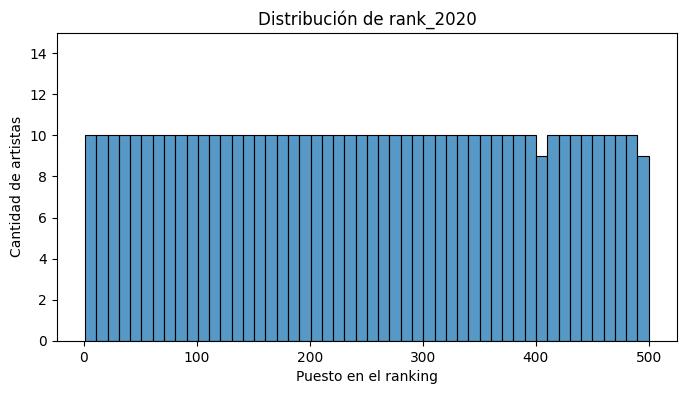

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_copia['rank_2020'], bins=50, kde=False)
plt.title('Distribución de rank_2020')
plt.xlabel('Puesto en el ranking')
plt.ylabel('Cantidad de artistas')
plt.ylim(0, 15)
plt.show()

El histograma complementa la información de la tabla de estadísticas descriptivas al mostrar que la **distribución de los artistas** en los puestos del ranking 2020 de Rolling Stone es bastante **uniforme**. Las barras muestran la concentración de artistas en intervalos de 10 puestos del ranking, con una **concentración** menor en los rangos de los puestos **400-410** y **490-500**.

Esta concentración menor se debe a que las filas que componen el ranking 2020 en el dataset son **498**, no 500, debido a la eliminación de 2 filas por valores NaN. Eso explica el motivo por el cual entre los rangos mencionados haya **9 artistas**, y no 10.

Cada barra representa un rango de 10 puestos del ranking, lo que indica que, en promedio, hay aproximadamente 10 artistas ubicados dentro de cada intervalo. Esto refuerza la idea de que **no hay una agrupación fuerte en ninguna parte del ranking**, lo que refleja una distribución relativamente equilibrada de los artistas en los puestos de 1 a 500.

En otras palabras, como estamos trabajando con un ranking, **era de esperar** una distribución "uniforme" o "normal" en la que cada puesto entre 1 y 500 esté ocupado por un único artista. Esto hace que la distribución de posiciones en el ranking sea bastante regular, ya que no es posible que dos artistas ocupen el mismo puesto en el ranking. Por lo tanto, la distribución de los artistas en los diferentes rangos de posiciones sigue una lógica que refleja una estructura estandarizada, donde la mayoría de los puestos están ocupados de manera equitativa.

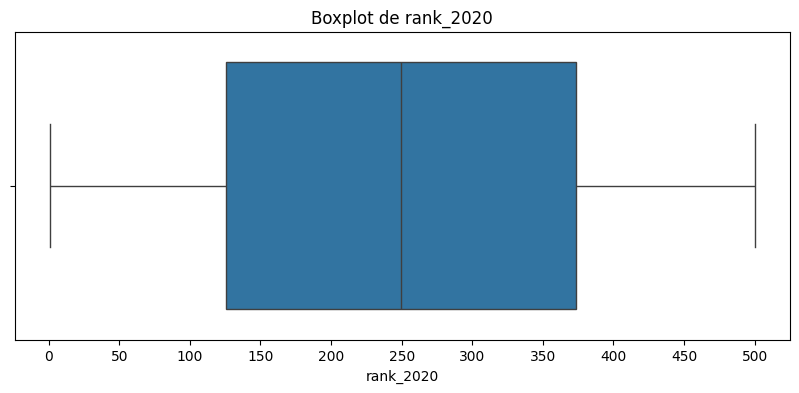

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_copia['rank_2020'])
plt.title('Boxplot de rank_2020')
plt.xticks(range(0, 501, 50))
plt.show()

El **boxplot** **confirma la distribución uniforme de los artistas** en el ranking 2020 de Rolling Stone:

* La **mediana** se encuentra en el puesto 250, indicando que la mitad de los
artistas están por encima y la otra mitad por debajo de esta posición.
* La **caja**, que abarca desde el puesto 125 hasta el 370, muestra que la mayoría de los artistas se concentran en posiciones intermedias del ranking.
*  Los **bigotes** se extienden hasta los extremos del ranking, dado que los valores ocupan todo el rango de la variable, y no se quedan concentrados cerca de la caja. Esto refuerza la idea de que los datos están distribuidos de manera bastante uniforme a lo largo de todo el ranking, sin concentraciones significativas en ninguna sección.
* **No se observan outliers**, lo que refuerza la idea de que la distribución es bastante homogénea a lo largo del ranking.

## 1.3. **Revisión de estadística descriptiva de la variable indice_popularidad_spotify**

In [ ]:
df_copia['indice_popularidad_spotify'].describe()

,indice_popularidad_spotify
count,653.000000
mean,55.852986
std,14.911183
min,10.000000
25%,46.000000
50%,57.000000
75%,68.000000
max,91.000000


La tabla de estadísticas descriptivas nos permiten arribar a las siguientes conclusiones preliminares:
1. El valor **mínimo** y **máximo** de los puntajes se ubican entre **10 y 91**, lo que sugiere que, a diferencia de lo determinado en el ranking 2020 de Rolling Stone con la existencia afirmativa de un puesto N°1, no ha habido ningún artista que haya logrado la consagración del 100% de la audiencia. Esto podría estar relacionado a varios factores:
- La **mayor heterogeneidad de la audiencia popular**, en comparación con la crítica especializada, cuyo grupo evaluador puede resultar más homogéneo en términos socioeconómicos, generacionales y culturales. Esta homogeneidad podría generar una mayor coincidencia en las evaluaciones, lo que limita la dispersión de las puntuaciones.
- Las **diferencias en las métricas de medición**: mientras que en un ranking tradicional siempre existirá un puesto 1, en plataformas como Spotify **la medición está sujeta al algoritmo**, que depende de factores variables como las preferencias del público y la popularidad de las canciones en el momento. Esto genera una mayor dispersión y dificulta que un artista logre el 100% de popularidad.
- El **algoritmo de Spotify**: el nivel de visibilidad de un artista en Spotify suele estar determinado por factores como el n° de reproducciones recientes, la cantidad de oyentes únicos, la ubicación geográfica de los oyentes, tendencias recientes y preferencias personalizadas. Esta multiplicidad de factores, sumado a que la plataforma segmenta su audiencia de manera diversa, **limita que un único artista logre una consagración absoluta** en toda la base de usuarios.
2. La **media y la mediana están cercanas** (55.85 y 57, respectivamente): esto indica que la distribución de los datos es relativamente simétrica. Sin embargo, la diferencia entre estos valores refleja la leve inclinación de los puntajes hacia la izquierda (sesgo negativo), lo que sugiere que hay **más artistas con puntuaciones más bajas que altas**.
3. El **valor de la desviación estándar**: una std de 14.91 revela una dispersión moderada en torno a la media, lo que implica que **las puntuaciones de los artistas varían considerablemente, pero no de manera extrema**, con la mayoría de los artistas agrupados en torno a la media.
4. El **valor del tercer cuartil** (Q3): el hecho de que el 75% de los artistas se ubiquen entre los puntajes de 10 y 68 indica que la mayoría de los artistas están posicionados en rangos de puntuación bajos a moderados, reflejando que **el grueso de los artistas en el ranking no alcanza las posiciones más altas**.

## 1.4. **Visualización de la distribución de indice_popularidad_spotify**

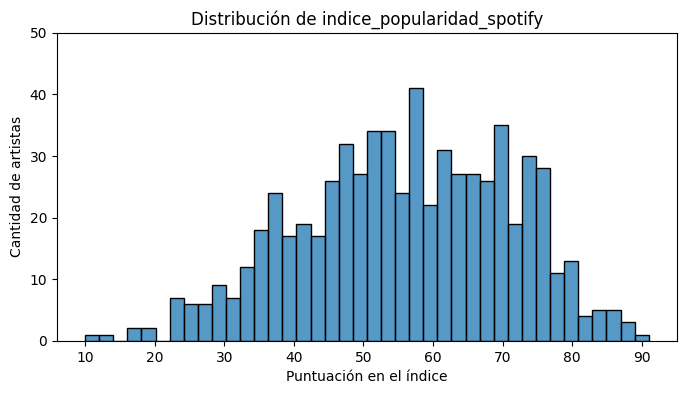

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_copia['indice_popularidad_spotify'], bins=40, kde=False)
plt.title('Distribución de indice_popularidad_spotify')
plt.xlabel('Puntuación en el índice')
plt.ylabel('Cantidad de artistas')
plt.ylim(0, 50)
plt.show()

In [ ]:
moda_indice_popularidad_spotify = df_copia['indice_popularidad_spotify'].mode()
print(f"La moda es: {moda_indice_popularidad_spotify}")

La moda es: 0    58.0
Name: indice_popularidad_spotify, dtype: float64


El **histograma** muestra que la distribución de las puntuaciones del Índice de Popularidad de Spotify **no es uniforme**. Las barras revelan que la mayor concentración de artistas se encuentra en el rango de puntuaciones de **40 a 70** puntos, lo que coincide con la ubicación de los cuartiles **Q1** y **Q3** según las estadísticas descriptivas.

La **moda** del índice es **58**, lo que significa que este **puntaje es el más frecuente** entre los artistas del ranking 2020 de Rolling Stone. Esto indica que la mayor agrupación de artistas se encuentra en torno a este valor, lo que sugiere una distribución algo sesgada y no completamente equilibrada.

A diferencia de los rankings tradicionales, el Índice de Popularidad de Spotify no requiere que cada artista ocupe un único puesto en la escala (de 0 a 100). Esta característica también **contribuye a la dispersión de los valores** observados en el histograma.

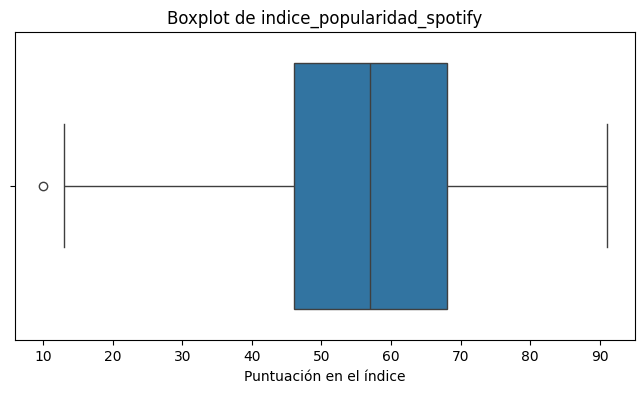

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_copia['indice_popularidad_spotify'])
plt.title('Boxplot de indice_popularidad_spotify')
plt.xlabel('Puntuación en el índice')
plt.show()

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_copia['indice_popularidad_spotify'].quantile(0.25)
Q3 = df_copia['indice_popularidad_spotify'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Mostrar el IQR
print(f'Rango intercuartílico (IQR): {IQR}')

Rango intercuartílico (IQR): 22.0


In [ ]:
#Calcular los extremos de los bigotes del boxplot

bigote_izquierdo = Q1 - 1.5 * IQR
bigote_derecho = Q3 + 1.5 * IQR

# Mostrar los resultados
print(f'Extremo izquierdo del bigote: {bigote_izquierdo}')
print(f'Extremo derecho del bigote: {bigote_derecho}')

Extremo izquierdo del bigote: 13.0
Extremo derecho del bigote: 101.0


El **boxplot** nos permite llegar a las siguientes conclusiones:

- **Mayor variabilidad en los primeros valores del índice**:
el primer 25% de los artistas se ubica entre los puntajes 10 y 46, lo que implica una **mayor dispersión en los valores bajos del índice**. Se requieren 36 puntos para cubrir ese rango. Esta variabilidad se refleja visualmente en el boxplot horizontal, donde el bigote izquierdo se extiende más, lo que refuerza la idea de que en los niveles bajos de popularidad hay más distancia entre los artistas.

- **Concentración de artistas en el rango medio del índice**: el siguiente 25% de los datos (de Q1 a la mediana) está contenido entre los 46 y 57 puntos, lo cual indica una mayor concentración de artistas en ese tramo medio del índice. A pesar de contener la misma proporción de artistas, este rango abarca solo 11 puntos, lo que sugiere que muchos comparten niveles similares de popularidad.

- **Más de la mitad de los artistas en un rango reducido**: entre Q2 (57) y Q3 (68) también hay solo 11 puntos. Esto implica que **el 50% de los artistas están concentrados en un rango de 22 puntos**, como lo demuestra el cálculo del rango intercuartílico (IQR).

- **Poca dispersión entre los artistas más populares**: entre Q3 (68) y el valor máximo (91) se extienden 23 puntos, en los cuales se dispersan los artistas con mayor consagración por parte de la audiencia. Esta mayor dispersión indica que **hay pocos artistas en este tramo más alto**, a diferencia de los que están concentrados en el centro del índice.

- **Identificación de outliers y valores normales**: los extremos de los bigotes se ubican entre los valores 13 y 101, lo que indica que todos los valores dentro de este rango se consideran “normales”. Por esta razón, el **único outlier** queda marcado en el valor **10**, coincidente con el valor mínimo de la tabla según las estadísticas descriptivas.

## **1.5. ¿Qué tipo de correlación hay entre las variables Raking 2020 e Índice de Popularidad de Spotify?**

In [ ]:
df_copia.isnull().sum()

,0
nombre_artista,0
album,0
rank_2020,188
genero_musical_album,0
indice_popularidad_spotify,33
genero_artista,0
edad_promedio_ingreso_ranking,0
años_entre_debut_y_album_top500,0


## 1.5.1. Filtrado de filas con valores completos

En línea con las decisiones metodológicas tomadas durante la etapa de Transform en el proceso ETL sobre el tratamiento de valores faltantes, **se filtrarán las filas** que tengan **valores completos** en las columnas relevantes al proceso de análisis comparativos. Este enfoque es especialmente importante para el posterior cálculo de la correlación de Pearson entre las variables rank_2020 e indice_popularidad_spotify, ya que se requieren filas con valores completos en todas las variables relevantes para obtener un **análisis válido**. Esto se debe a que no es posible cruzar valores numéricos de una variable con valores nulos en la otra, ya que este tipo de discrepancia generaría errores en el cálculo de la correlación. De este modo, se asegura la **fiabilidad** y **precisión** de los resultados al trabajar únicamente con datos completos.

In [ ]:
# Filtrar filas con NaN en cualquiera de las dos columnas
filas_con_nan = df_copia[df_copia[['rank_2020', 'indice_popularidad_spotify']].isna().any(axis=1)]

# Contar el número de filas con NaN
print(f"Filas con NaN en al menos una de las columnas: {len(filas_con_nan)}")

Filas con NaN en al menos una de las columnas: 209


## 1.5.2. Cálculo de correlación de Pearson entre rank_2020 e indice_popularidad_spotify

In [ ]:
# Filtrar las filas que no tienen valores NaN en 'rank_2020' e 'indice_popularidad_spotify'
df_completo = df_copia.dropna(subset=['rank_2020', 'indice_popularidad_spotify'])

# Ahora calcular la correlación con los datos filtrados
correlacion = df_completo['rank_2020'].corr(df_completo['indice_popularidad_spotify'])
print(f'La correlación de Pearson entre rank_2020 e indice_popularidad_spotify es: {correlacion}')

La correlación de Pearson entre rank_2020 e indice_popularidad_spotify es: -0.21523285118066224


El valor obtenido de -0.215 indica una **correlación negativa débil** entre el ranking 2020 de Rolling Stone y el Índice de Popularidad de Spotify. Esto sugiere que, en general, a medida que un artista mejora su posición en el ranking (es decir, se acerca al puesto 1), su popularidad en Spotify podría disminuir levemente, aunque la relación es muy tenue.

La debilidad del vínculo implica que **no hay un patrón claro ni consistente entre ambas variables**. Aunque existe una leve tendencia opuesta entre crítica y público, el resultado está más cerca de 0 que de -1, lo que señala que **la relación lineal entre variables es baja**, y **no puede considerarse significativa**.

Insights:
- Las **preferencias de la crítica y de la audiencia no parecieran estar fuertemente asociadas**, lo que sugiere que responden a criterios distintos de valoración con respecto a los artistas.
- Pueden encontrarse **casos dispares**: artistas muy bien posicionados en Rolling Stone y poco populares en Spotify, o lo contrario. También existen combinaciones intermedias, sin un patrón estable, por ejemplo, artistas mal posicionados en Rolling Stone (menos canonizados por la crítica) y con popularidad moderada en Spotify (más valorados por el público).
-** No es posible predecir el comportamiento de una variable a partir de la otra**. La correlación observada representa una **tendencia general débil**, no una regla firme, lo que sugiere que intervienen múltiples factores que afectan el comportamiento de ambas variables. En la **segunda fase del análisis exploratorio (EDA)**, se buscará observar si los **indicadores descriptivos** —como el género musical del álbum, edad, trayectoria o género del artista— tienen algún grado de influencia. Sin embargo, es importante reconocer que también pueden incidir **otros tipos posibles de variables** que, aunque quizás relevantes, quedan por fuera del alcance del presente trabajo.

## 1.5.3. Visualización de la correlación entre las variables rank_2020 e indice_popularidad_spotify

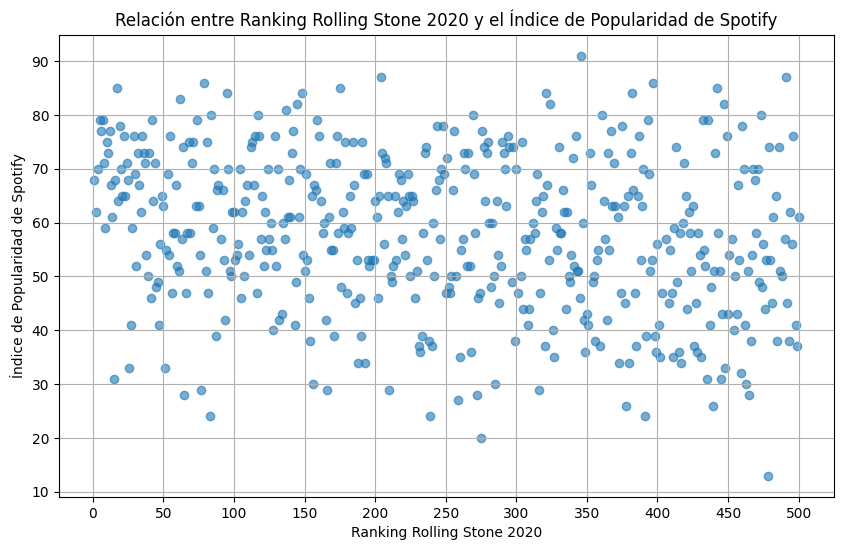

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_completo['rank_2020'], df_completo['indice_popularidad_spotify'], alpha=0.6)

plt.title('Relación entre Ranking Rolling Stone 2020 y el Índice de Popularidad de Spotify')
plt.xlabel('Ranking Rolling Stone 2020')
plt.ylabel('Índice de Popularidad de Spotify')
plt.grid(True)
plt.xticks(ticks=range(0, 501, 50))
plt.show()

Si bien el análisis detallado de los cruces entre variables se abordará en la siguiente fase del EDA, pueden señalarse algunas **observaciones iniciales**:

- **La dispersión es elevada**. Existen artistas altamente valorados tanto por la crítica como por la audiencia, pero también casos en los que solo uno de los dos actores los reconoce, e incluso artistas con bajo reconocimiento en ambos frentes.
- **No se observa una relación lineal clara entre ambas variables**, lo que refuerza la idea de que **intervienen múltiples factores** en la valoración de los artistas.


## ⭐ **FASE 2 - ¿Quiénes son los mejores... y por qué? Características de los grandes artistas según la crítica y la audiencia**

## 2.1. Top 5 Artistas: Ranking 2020 Rolling Stone vs. Índice de Popularidad de Spotify

Con el objetivo de asegurar la calidad y la transparencia del análisis, se creó una **nueva versión del dataset original** (df_filtrado_eda) que contiene únicamente las **filas con valores completos** en las variables clave del estudio. Esta decisión responde a principios éticos fundamentales del presente trabajo, que indican que, para realizar análisis comparativos, es necesario contar con datos completos en todas las columnas involucradas en el análisis. La **única excepción** a esta regla fue la variable **indice_popularidad_spotify**, ya que contiene valores como "Not on Spotify" que, si bien no son numéricos, aportan información valiosa sobre la presencia o ausencia de ciertos artistas en esta plataforma, y las implicancias que esto conlleva. Eliminar estos casos implicaría perder información clave para la obtención de insights, por lo que se decidió conservarlos deliberadamente.

In [ ]:
# Crear una copia del dataset df_copia
df_prueba = df_copia.copy()

# Filtrar filas con valores completos en todas las columnas clave, excepto 'indice_popularidad_spotify'
columnas_clave = ['nombre_artista', 'album', 'rank_2020', 'genero_musical_album',
                  'genero_artista', 'edad_promedio_ingreso_ranking', 'años_entre_debut_y_album_top500']

# Crear una versión filtrada del dataset
df_prueba = df_copia.dropna(subset=columnas_clave)

# Top 5 del Ranking 2020 de Rolling Stone
top5_rank_2020 = df_prueba.nsmallest(5, 'rank_2020')[['nombre_artista', 'album', 'rank_2020', 'indice_popularidad_spotify', 'genero_musical_album', 'genero_artista', 'edad_promedio_ingreso_ranking', 'años_entre_debut_y_album_top500']]

# Top 5 del Índice de Popularidad de Spotify
top5_indice_popularidad_spotify = df_prueba.nlargest(5, 'indice_popularidad_spotify')[['nombre_artista', 'album', 'indice_popularidad_spotify', 'rank_2020', 'genero_musical_album', 'genero_artista', 'edad_promedio_ingreso_ranking', 'años_entre_debut_y_album_top500']]

# Mostrar resultados
print("Top 5 del Ranking 2020 de Rolling Stone:")
print(top5_rank_2020)

print("\nTop 5 del Índice de Popularidad de Spotify:")
print(top5_indice_popularidad_spotify)

Top 5 del Ranking 2020 de Rolling Stone:
     nombre_artista                     album  rank_2020  \
226     Marvin Gaye           What's Going On          1   
102  The Beach Boys                Pet Sounds          2   
221   Joni Mitchell                      Blue          3   
370   Stevie Wonder  Songs in the Key of Life          4   
165     The Beatles                Abbey Road          5   

     indice_popularidad_spotify                 genero_musical_album  \
226                        68.0                      Soul/Gospel/R&B   
102                        62.0                          Desconocido   
221                         NaN  Country/Folk/Country Rock/Folk Rock   
370                        70.0                      Soul/Gospel/R&B   
165                        79.0                          Desconocido   

    genero_artista  edad_promedio_ingreso_ranking  \
226           Male                      32.000000   
102           Male                      23.166667   
221   

## 2.2. Estudio de los Líderes del Ranking: Análisis Comparativo de los Top 5 de Rolling Stone 2020 y el Índice de Popularidad de Spotify

In [ ]:
# Se unen los Top 5 de ambas variables
top5_completo = pd.concat([top5_rank_2020, top5_indice_popularidad_spotify])

# Se seleccionan los indicadores descriptivos para la caracterización
top5_completo[['nombre_artista', 'album', 'rank_2020', 'indice_popularidad_spotify',
               'genero_musical_album', 'genero_artista', 'edad_promedio_ingreso_ranking',
               'años_entre_debut_y_album_top500']]

,nombre_artista,album,rank_2020,indice_popularidad_spotify,genero_musical_album,genero_artista,edad_promedio_ingreso_ranking,años_entre_debut_y_album_top500
226,Marvin Gaye,What's Going On,1,68.0,Soul/Gospel/R&B,Male,32.000000,10
102,The Beach Boys,Pet Sounds,2,62.0,Desconocido,Male,23.166667,4
221,Joni Mitchell,Blue,3,NaN,Country/Folk/Country Rock/Folk Rock,Female,28.000000,3
370,Stevie Wonder,Songs in the Key of Life,4,70.0,Soul/Gospel/R&B,Male,26.000000,14
165,The Beatles,Abbey Road,5,79.0,Desconocido,Male,27.750000,6
347,Arctic Monkeys,AM,346,91.0,Indie/Alternative Rock,Male,27.500000,7
245,Kanye West,Graduation,204,87.0,Hip-Hop/Rap,Male,30.000000,3
447,Harry Styles,Fine Line,491,87.0,Indie/Alternative Rock,Male,25.000000,2
69,Billie EIlish,When We All Fall Asleep Where Do We Go?,397,86.0,Indie/Alternative Rock,Female,18.000000,0
155,Frank Ocean,Blonde,79,86.0,Soul/Gospel/R&B,Male,29.000000,4


In [ ]:
# Exportar el dataset top5_completo en un archivo CSV
top5_completo.to_csv('top5_completo.csv', index=False)

In [ ]:
from google.colab import files
files.download('top5_completo.csv')

# Descarga el archivo CSV generado al dispositivo local para para su uso como fuente de datos en la fase de visualización de datos.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **2.2.1. Caracterización del Top 5 de Rolling Stone 2020**

## 2.2.1.1. Puntajes en el Índice de Popularidad de Spotify: promedio

In [ ]:
media_popularidad_critica = top5_completo.head(5)['indice_popularidad_spotify'].mean()
print(f'La media de las puntuaciones del Índice de Popularidad en Spotify para el Top 5 de la crítica es: {media_popularidad_critica:.2f}')

La media de las puntuaciones del Índice de Popularidad en Spotify del Top 5 de Rolling Stone 2020 es: 69.75


## 2.2.1.2. Posiciones según el Ranking 2020 de Rolling Stone: promedio

In [ ]:
media_ranking2020_critica = top5_completo.head(5)['rank_2020'].mean()
print(f'La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la crítica es: {media_ranking2020_critica:.2f}')

La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la crítica es: 3.00


## 2.2.1.3. Género musical del álbum: moda

In [ ]:
moda_genero_album_critica = top5_completo.head(5)['genero_musical_album'].mode()
print(f"El género musical más reconocido en el Top 5 de la crítica es: {moda_genero_album_critica}")

El género musical más reconocido en el Top 5 de la crítica es: 0        Desconocido
1    Soul/Gospel/R&B
Name: genero_musical_album, dtype: object


## 2.2.1.4. Género del artista: moda

In [ ]:
moda_genero_artista_critica = top5_completo.head(5)['genero_artista'].mode()
print(f"El género del artista más predominante en el Top 5 de la crítica es: {moda_genero_artista_critica}")

El género del artista más predominante en el Top 5 de la crítica es: 0    Male
Name: genero_artista, dtype: object


## 2.2.1.5. Edad promedio de ingreso al ranking Rolling Stone: promedio

In [ ]:
media_edad_ingreso_critica = top5_completo.head(5)['edad_promedio_ingreso_ranking'].mean()
print(f'La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de la crítica es: {media_edad_ingreso_critica:.2f}')

La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de Rolling Stone 2020 es: 27.38


## 2.2.1.6. Años transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone: promedio

In [ ]:
media_años_transcurridos_critica = top5_completo.head(5)['años_entre_debut_y_album_top500'].mean()
print(f'La media de los años transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de la crítica es: {media_años_transcurridos_critica:.2f}')

La media de los años transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de Rolling Stone 2020 es: 7.40


## **2.2.2. Caracterización del Top 5 según el Índice de Popularidad de Spotify**

## 2.2.2.1. Posiciones según el Ranking 2020 de Rolling Stone: promedio

In [ ]:
media_ranking2020_audiencia = top5_completo.tail(5)['rank_2020'].mean()
print(f'La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular es: {media_ranking2020_audiencia:.2f}')

La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular según el Índice de Popularidad de Spotify es: 303.40


In [ ]:
mediana_ranking2020_audiencia = top5_completo.tail(5)['rank_2020'].median()
print(f'La mediana de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular es: {mediana_ranking2020_audiencia:.2f}')

La mediana de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular según el Índice de Popularidad de Spotify es: 346.00


## 2.2.2.2. Puntajes en el Índice de Popularidad de Spotify: promedio

In [ ]:
media_popularidad_audiencia = top5_completo.tail(5)['indice_popularidad_spotify'].mean()
print(f'La media de las puntuaciones del Índice de Popularidad en Spotify para el Top 5 de la audiencia popular es: {media_popularidad_audiencia:.2f}')

La media de las puntuaciones del Índice de Popularidad en Spotify para el Top 5 de la audiencia es: 87.40


## 2.2.2.3. Género musical del álbum: moda

In [ ]:
moda_genero_album_audiencia = top5_completo.tail(5)['genero_musical_album'].mode()
print(f"El género musical más reconocido en el Top 5 de la audiencia popular es: {moda_genero_album_audiencia}")

El género musical más reconocido en el Top 5 de la audiencia es: 0    Indie/Alternative Rock
Name: genero_musical_album, dtype: object


## 2.2.2.4. Género del artista: moda

In [ ]:
moda_genero_artista_audiencia = top5_completo.tail(5)['genero_artista'].mode()
print(f"El género del artista más predominante en el Top 5 de la audiencia popular es: {moda_genero_artista_audiencia}")

El género del artista más predominante en el Top 5 de la audiencia es: 0    Male
Name: genero_artista, dtype: object


## 2.2.2.5. Edad promedio de ingreso al ranking Rolling Stone: promedio

In [ ]:
media_edad_ingreso_audiencia = top5_completo.tail(5)['edad_promedio_ingreso_ranking'].mean()
print(f'La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de la audiencia popular es: {media_edad_ingreso_audiencia:.2f}')

La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de la audiencia es: 25.90


## 2.2.2.6. Años transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone: promedio

In [ ]:
media_años_transcurridos_audiencia = top5_completo.tail(5)['años_entre_debut_y_album_top500'].mean()
print(f'La media de los años transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de la audiencia popular es: {media_años_transcurridos_audiencia:.2f}')

La media de los años transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de la audiencia es: 3.20
